# Final Python Notebook 1: Data Understanding and Preprocessing


In [323]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [324]:
# Load the Dataset
df = pd.read_csv("5DATA001C.2 Coursework Dataset.csv")

In [325]:
# Dataset overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Patient_ID              4024 non-null   object 
 1   Month_of_Birth          4024 non-null   int64  
 2   Age                     4015 non-null   float64
 3   Sex                     4024 non-null   object 
 4   Occupation              86 non-null     object 
 5   T_Stage                 4024 non-null   object 
 6   N_Stage                 4024 non-null   object 
 7   6th_Stage               4024 non-null   object 
 8   Differentiated          4024 non-null   object 
 9   Grade                   4024 non-null   int64  
 10  A_Stage                 4016 non-null   object 
 11  Tumor_Size              4021 non-null   float64
 12  Estrogen_Status         4024 non-null   object 
 13  Progesterone_Status     4024 non-null   object 
 14  Regional_Node_Examined  4008 non-null   

In [326]:
# Display column names
print("Column Names:\n", df.columns.tolist())

Column Names:
 ['Patient_ID', 'Month_of_Birth', 'Age', 'Sex', 'Occupation', 'T_Stage', 'N_Stage', '6th_Stage', 'Differentiated', 'Grade', 'A_Stage', 'Tumor_Size', 'Estrogen_Status', 'Progesterone_Status', 'Regional_Node_Examined', 'Reginol_Node_Positive', 'Survival_Months', 'Mortality_Status']


In [327]:
# Display dataset shape
print("Dataset shape (rows, columns):", df.shape)

Dataset shape (rows, columns): (4024, 18)


In [328]:
# Display data types
print("\nData types:\n", df.dtypes)


Data types:
 Patient_ID                 object
Month_of_Birth              int64
Age                       float64
Sex                        object
Occupation                 object
T_Stage                    object
N_Stage                    object
6th_Stage                  object
Differentiated             object
Grade                       int64
A_Stage                    object
Tumor_Size                float64
Estrogen_Status            object
Progesterone_Status        object
Regional_Node_Examined    float64
Reginol_Node_Positive     float64
Survival_Months             int64
Mortality_Status           object
dtype: object


In [329]:
# Display random sample
print("\nSample data:\n")
print(df.sample(5))


Sample data:

     Patient_ID  Month_of_Birth   Age     Sex Occupation T_Stage N_Stage  \
1755      A1767               7  31.0    Male        NaN      T3      N2   
2230      A2242              10  47.0  Female        NaN      T2      N2   
2924      A2936               2  50.0  Female        NaN      T2      N1   
3298      A3310               2  54.0  Female        NaN      T2      N1   
3300      A3312               7  49.0  Female        NaN      T1      N1   

     6th_Stage             Differentiated  Grade   A_Stage  Tumor_Size  \
1755      IIIA      Poorly differentiated      3  Regional        65.0   
2230      IIIA  Moderately differentiated      2  Regional        45.0   
2924       IIB  Moderately differentiated      2  Regional        25.0   
3298       IIB  Moderately differentiated      2  Regional        36.0   
3300       IIA      Poorly differentiated      3  Regional        10.0   

     Estrogen_Status Progesterone_Status  Regional_Node_Examined  \
1755        Pos

In [330]:
# Display missing value counts
print("\nMissing Values Count:\n")
print(df.isnull().sum())


Missing Values Count:

Patient_ID                   0
Month_of_Birth               0
Age                          9
Sex                          0
Occupation                3938
T_Stage                      0
N_Stage                      0
6th_Stage                    0
Differentiated               0
Grade                        0
A_Stage                      8
Tumor_Size                   3
Estrogen_Status              0
Progesterone_Status          0
Regional_Node_Examined      16
Reginol_Node_Positive       54
Survival_Months              0
Mortality_Status             0
dtype: int64


In [331]:
# Display missing value percentage
print("\nMissing Values Percentage:\n")
print((df.isnull().sum() / len(df)) * 100)


Missing Values Percentage:

Patient_ID                 0.000000
Month_of_Birth             0.000000
Age                        0.223658
Sex                        0.000000
Occupation                97.862823
T_Stage                    0.000000
N_Stage                    0.000000
6th_Stage                  0.000000
Differentiated             0.000000
Grade                      0.000000
A_Stage                    0.198807
Tumor_Size                 0.074553
Estrogen_Status            0.000000
Progesterone_Status        0.000000
Regional_Node_Examined     0.397614
Reginol_Node_Positive      1.341948
Survival_Months            0.000000
Mortality_Status           0.000000
dtype: float64


In [332]:
# Descriptive stats for numeric columns
print("\nDescriptive statistics for numeric variables:\n")
print(df.describe())


Descriptive statistics for numeric variables:

       Month_of_Birth          Age        Grade   Tumor_Size  \
count     4024.000000  4015.000000  4024.000000  4021.000000   
mean         6.481362    53.995019     2.150596    30.456603   
std          3.475442     8.988199     0.638234    21.107340   
min          1.000000    30.000000     1.000000     1.000000   
25%          3.000000    47.000000     2.000000    16.000000   
50%          6.000000    54.000000     2.000000    25.000000   
75%         10.000000    61.000000     3.000000    38.000000   
max         12.000000    89.000000     4.000000   140.000000   

       Regional_Node_Examined  Reginol_Node_Positive  Survival_Months  
count             4008.000000           3.970000e+03      4024.000000  
mean                14.361277           5.042920e+03        71.472167  
std                  8.152846           3.174827e+05        25.361855  
min                -18.000000           1.000000e+00         1.000000  
25%            

In [333]:
# Descriptive stats for categorical columns
print("\nDescriptive statistics for categorical variables:\n")
print(df.describe(include=['object']))


Descriptive statistics for categorical variables:

       Patient_ID     Sex    Occupation T_Stage N_Stage 6th_Stage  \
count        4024    4024            86    4024    4024      4024   
unique       4024       2            40       4       3         5   
top         A4035  Female  House Person      T2      N1       IIA   
freq            1    2561             4    1786    2732      1305   

                   Differentiated   A_Stage Estrogen_Status  \
count                        4024      4016            4024   
unique                          4         2               2   
top     Moderately differentiated  Regional        Positive   
freq                         2351      3924            3755   

       Progesterone_Status Mortality_Status  
count                 4024             4024  
unique                   2                7  
top               Positive            Alive  
freq                  3326             3399  


In [334]:
# Filter only deceased patients for regression
regression_df = df[df['Mortality_Status'] == 'Dead'].copy()

# Drop irrelevant columns and set target
X_reg = regression_df.drop(columns=['Patient_ID', 'Survival_Months', 'Mortality_Status'])
y_reg = regression_df['Survival_Months']

In [335]:
# Dataset Dimensions
print(X_reg.shape, y_reg.shape)

(598, 15) (598,)


In [336]:
# List of Retained Features
print(X_reg.columns.tolist())

['Month_of_Birth', 'Age', 'Sex', 'Occupation', 'T_Stage', 'N_Stage', '6th_Stage', 'Differentiated', 'Grade', 'A_Stage', 'Tumor_Size', 'Estrogen_Status', 'Progesterone_Status', 'Regional_Node_Examined', 'Reginol_Node_Positive']


In [337]:
# Drop Unnecessary Columns
df = df.drop(columns=['Patient_ID', 'Occupation', 'Month_of_Birth', 'A_Stage'])
print(df.columns.tolist())

['Age', 'Sex', 'T_Stage', 'N_Stage', '6th_Stage', 'Differentiated', 'Grade', 'Tumor_Size', 'Estrogen_Status', 'Progesterone_Status', 'Regional_Node_Examined', 'Reginol_Node_Positive', 'Survival_Months', 'Mortality_Status']


In [338]:
# Fill missing values appropriately
df['Age'].fillna(df['Age'].mode()[0], inplace=True)
df['Tumor_Size'].fillna(df['Tumor_Size'].median(), inplace=True)
df['Regional_Node_Examined'].fillna(df['Regional_Node_Examined'].median(),inplace=True)
df['Reginol_Node_Positive'].fillna(df['Reginol_Node_Positive'].median(),inplace=True)

/tmp/ipython-input-338-1072007892.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mode()[0], inplace=True)
/tmp/ipython-input-338-1072007892.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

In [339]:
# Display after fixed missing value counts
print("\nAfter fixed missing Values Count:\n")
print(df.isnull().sum())


After fixed missing Values Count:

Age                       0
Sex                       0
T_Stage                   0
N_Stage                   0
6th_Stage                 0
Differentiated            0
Grade                     0
Tumor_Size                0
Estrogen_Status           0
Progesterone_Status       0
Regional_Node_Examined    0
Reginol_Node_Positive     0
Survival_Months           0
Mortality_Status          0
dtype: int64


In [340]:
# Remove negative or unrealistic values
df = df[(df['Age'] >= 0) & (df['Age'] <= 120)]
df = df[df['Tumor_Size'] >= 0]

In [341]:
#Remove outliers using IQR
def remove_outliers_iqr(data, columns):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        data = data[(data[col] >= lower) & (data[col] <= upper)]
    return data

In [342]:
#Apply only to numeric columns excluding 'Mortality_Status'
numeric_cols = [col for col in df.select_dtypes(include='number').columns if col != 'Mortality_Status']
df_cleaned = remove_outliers_iqr(df, numeric_cols)

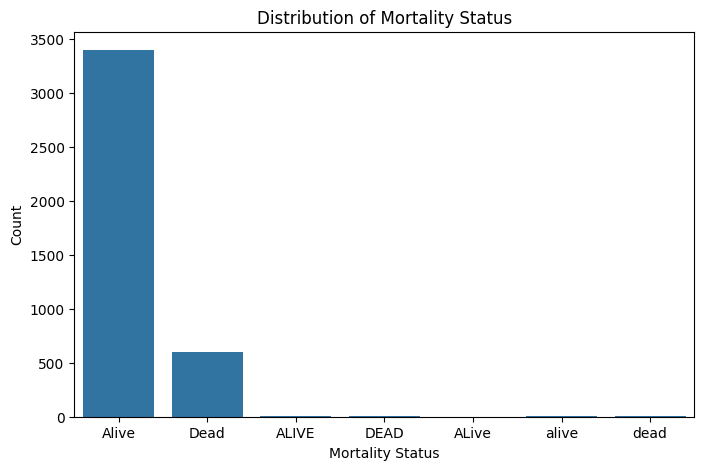

In [343]:
# Plot target variable distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Mortality_Status')
plt.title("Distribution of Mortality Status")
plt.xlabel("Mortality Status")
plt.ylabel("Count")
plt.show()

In [344]:
# Convert all values in Mortality_Status to lowercase (or uppercase)
df['Mortality_Status'] = df['Mortality_Status'].str.lower()

# Optionally, map values to consistent labels if needed
df['Mortality_Status'] = df['Mortality_Status'].map({
    'alive': 'alive',
    'dead': 'dead'
})

# Check unique values now
print(df['Mortality_Status'].unique())

['alive' 'dead']


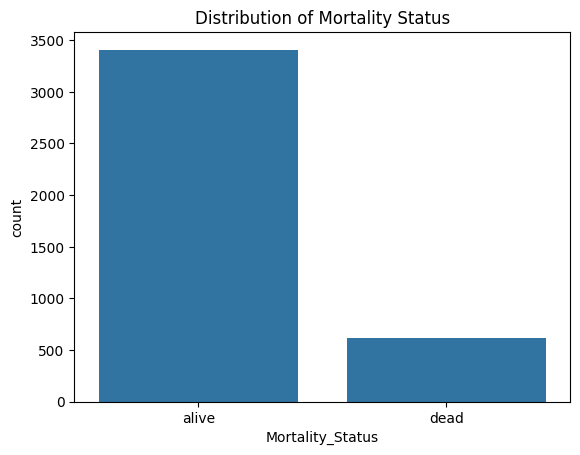

In [345]:
# Final Plot target variable distribution
sns.countplot(data=df, x='Mortality_Status')
plt.title('Distribution of Mortality Status')
plt.show()

In [346]:
# Define the scale types for each variable
scale_types = {
    'Age': 'Ratio',
    'Sex': 'Nominal',
    'T Stage': 'Ordinal',
    'N Stage': 'Ordinal',
    '6th Stage': 'Ordinal',
    'Differentiated': 'Ordinal',
    'Grade': 'Ordinal',
    'Tumour Size': 'Ratio',
    'Estrogen Status': 'Nominal',
    'Progesterone Status': 'Nominal',
    'Regional Node Examined': 'Ratio',
    'Regional Node Positive': 'Ratio'
}

# Display the variable scale types as a DataFrame
pd.DataFrame(scale_types.items(), columns=['Variable', 'Scale_Type'])

,Variable,Scale_Type
0,Age,Ratio
1,Sex,Nominal
2,T Stage,Ordinal
3,N Stage,Ordinal
4,6th Stage,Ordinal
5,Differentiated,Ordinal
6,Grade,Ordinal
7,Tumour Size,Ratio
8,Estrogen Status,Nominal
9,Progesterone Status,Nominal


In [347]:
# Drop any rows with missing target variable (Mortality Status)
df = df.dropna(subset=['Mortality_Status'])

In [348]:
# Encode Mortality Status target
target_encoder = LabelEncoder()
df['Mortality_Status'] = target_encoder.fit_transform(df['Mortality_Status'])

In [349]:
# Optional: Encode Sex, Estrogen/Progesterone status if categorical
for col in ['Sex', 'Estrogen Status', 'Progesterone Status', 'Occupation', 'T Stage', 'N Stage', '6th Stage', 'Differentiated', 'A Stage']:
    if col in df.columns and df[col].dtype == 'object':
        df[col] = LabelEncoder().fit_transform(df[col].astype(str))

In [350]:
print(df[['Sex', 'Estrogen_Status', 'Progesterone_Status', 'T_Stage', 'N_Stage', 'Differentiated', 'Grade']].dtypes)

Sex                     int64
Estrogen_Status        object
Progesterone_Status    object
T_Stage                object
N_Stage                object
Differentiated          int64
Grade                   int64
dtype: object


In [351]:
# Dataset Save Option
cleaned_path = "cleaned_cancer_dataset.csv"
df.to_csv(cleaned_path, index=False)
print(f"\nCleaned dataset saved as: {cleaned_path}")


Cleaned dataset saved as: cleaned_cancer_dataset.csv
